# 1. Support Vector Machine (SVM)
Key objective of SVM is to draw a hyperplane which separates the two classes optimally such that the margin is maximum between the hyperplane and the observations.

Key parameters:

- **C** – the penalty parameter, it helps in fitting the boundaries smoothly and appropriately, **default=1**;
- **Kernel** – it must be one of **rbf/linear/poly/sigmoid/precomputed**, **default='rbf'** (*Radial Basis Function*). Choosing appropriate kernel will result in better model fit.

## Exercise 1: Multivariate and multi-class SVM model
First, we will load the **Iris** dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where **0=Iris-Setosa**, **1=Iris-Versicolor**, **2=Iris-Virginica**.

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
#X = iris.data[:, :]
y = iris.target
print('Class labels:', np.unique(y))

# Split data into train and test part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the model (SVC-Support Vector Classification)
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 1.0, random_state = 0)
clf.fit(X_train, y_train)

# Generate evaluation metrics
print('\nTrain - accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Train - confusion matrix:\n', metrics.confusion_matrix(y_train, clf.predict(X_train)))
print('Train - classification report:\n', metrics.classification_report(y_train, clf.predict(X_train)))

print('\nTest - accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))
print('Test - confusion matrix:\n', metrics.confusion_matrix(y_test, clf.predict(X_test)))
print('Test - classification report:\n', metrics.classification_report(y_test, clf.predict(X_test)))

Class labels: [0 1 2]

Train - accuracy: 0.9523809523809523
Train - confusion matrix:
 [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105


Test - accuracy: 0.9777777777777777
Test - confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weight

**Questions:**
1. How do you interpret the confusion matrices for the training and test datasets?
2. What is the purpose of data rescaling?
3. You used only petal length and petal width in the model. Compare the results with a model based on all 4 features.
4. Build models and compare their accuracy for **C=1** and 3 other kernels.
5. Build models and compare their accuracy for the best kernel found in the previous task and 3 other values of a penalty parameter.

**Answers:**

1. On the training dataset there are 5 misclassifications. 2 Versicolors are classified as Virginica and 3 Virginica as Versicolor. On the test dataset the errors are less, just one versicolor is classified as virginica.
2. Since SVM is sensitive to feature scaling, we need data rescaling to ensure all the features have equal impact on SVM and none of the features has dominance because of the larger values
3. In this case in train dataset 2 versicolors were classified as virginica and 1 virginica as versicolor. In test dataset one versicolor is classified as virginica. The result is better when all the features are included.
4. (code is below) The best kernel needs to be decided by train and test accuracy, but priority is test accuracy. In this case the best ones are Linear and RBF
5. (code is below) All values of C show 100% accuracy on test dataset, C=1 shows the best result on train data as well 96.2 %

In [5]:
# code for quesion 4, building model with different kernels

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

# Train and test SVM with different kernels
for kernel in kernels:
    model = SVC(kernel=kernel, C=1, random_state=42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results[kernel] = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test)
    }

# Print results
for kernel, scores in results.items():
    print(f"Kernel: {kernel}")
    print(f"  Train Accuracy: {scores['Train Accuracy']:.3f}")
    print(f"  Test Accuracy: {scores['Test Accuracy']:.3f}")


Kernel: linear
  Train Accuracy: 0.971
  Test Accuracy: 1.000
Kernel: poly
  Train Accuracy: 0.981
  Test Accuracy: 0.978
Kernel: rbf
  Train Accuracy: 0.962
  Test Accuracy: 1.000
Kernel: sigmoid
  Train Accuracy: 0.171
  Test Accuracy: 0.222


In [4]:
#code for question 5, different C values
best_kernel = 'rbf'

# Penalty parameter values to test
C_values = [0.1, 1, 10, 100]
results = {}

# Train and test SVM with different C values
for C in C_values:
    model = SVC(kernel=best_kernel, C=C, random_state=42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results[C] = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test)
    }

# Print results
for C, scores in results.items():
    print(f"C: {C}")
    print(f"  Train Accuracy: {scores['Train Accuracy']:.3f}")
    print(f"  Test Accuracy: {scores['Test Accuracy']:.3f}")


C: 0.1
  Train Accuracy: 0.952
  Test Accuracy: 1.000
C: 1
  Train Accuracy: 0.962
  Test Accuracy: 1.000
C: 10
  Train Accuracy: 0.952
  Test Accuracy: 1.000
C: 100
  Train Accuracy: 0.952
  Test Accuracy: 1.000


# 2. K-Nearest Neighbors (K-NN)
As the name suggests the algorithm works based on majority vote of its **K-Nearest Neighbors** class. **K** nearest neighbors for the unknown data point are identified based on the chosen distance metric (default=**'minkowski'**), and the unknown point will be classified based on majority class among identified nearest data points class. The key drawback of **K-NN** is the complexity in searching the nearest neighbors for each sample.

Things to remember:

- Choose an odd **K** value for a 2 class problem.
- **K** must not be a multiple of the number of classes.

## Exercise 2: K-Nearest Neighbors model
We use the same data set as in exercise 1.

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

iris = datasets.load_iris()
#X = iris.data[:, [2, 3]]
X = iris.data[:, :]
y = iris.target
print('Class labels:', np.unique(y))

# Split data into train and test part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Rescale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

# Generate evaluation metrics
print('\nTrain - accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Train - confusion matrix:\n', metrics.confusion_matrix(y_train, clf.predict(X_train)))
print('Train - classification report:\n', metrics.classification_report(y_train, clf.predict(X_train)))

print('\nTest - accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))
print('Test - confusion matrix:\n', metrics.confusion_matrix(y_test, clf.predict(X_test)))
print('Test - classification report:\n', metrics.classification_report(y_test, clf.predict(X_test)))

Class labels: [0 1 2]

Train - accuracy: 0.9714285714285714
Train - confusion matrix:
 [[34  0  0]
 [ 0 31  1]
 [ 0  2 37]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      0.97      0.95        32
           2       0.97      0.95      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105


Test - accuracy: 0.9777777777777777
Test - confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weight

**Questions:**
1. Compare the accuracy of the K-NN model with that of the SVM model.
2. You used only petal length and petal width in the model. Compare the results with a model based on all 4 features.
3. Select 2 correct **K** values. One should be smaller than **5** and the other bigger. Build models for these **K** and compare their accuracy with the model accuracy for **K=5**.

**Answers:**

In [24]:
#code for question 3

iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
print('Class labels:', np.unique(y))

# Split data into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Rescale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# k values are 3, 5, 7
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
print(f'\nk = 3 \nTrain - accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test - accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
print(f'\nk = 5 \nTrain - accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test - accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))

clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)
print(f'\nk = 7 \nTrain - accuracy:', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test - accuracy:', metrics.accuracy_score(y_test, clf.predict(X_test)))

Class labels: [0 1 2]

k = 3 
Train - accuracy: 0.9714285714285714
Test - accuracy: 0.9777777777777777

k = 5 
Train - accuracy: 0.9714285714285714
Test - accuracy: 0.9777777777777777

k = 7 
Train - accuracy: 0.9714285714285714
Test - accuracy: 0.9777777777777777


## Exercise 3: K-NN model decision boundary

In [25]:
# An auxiliary function that will be used to plot the decision boundary.
def plot_decision_regions(X, y, classifier):
    h = 0.02  # Step size in the mesh
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker=markers[idx], label=cl)

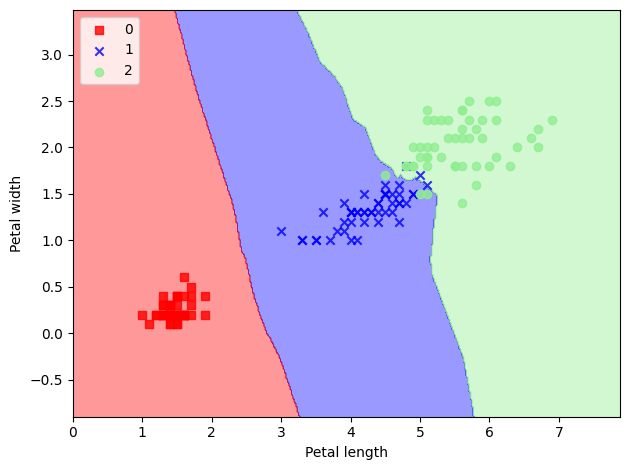

In [26]:
# Load data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Build a K-NN model
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X, y)

# Plot the decision boundary
plot_decision_regions(X, y, classifier = clf)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Questions:**
1. Considering the decision boundary, which species of **Iris** are better separated and which are worse? Justify your answer.
2. Plot the decision boundaries for the two **K** values used in the previous exercise and compare them with the boundary for **K=5**.

**Answers:**

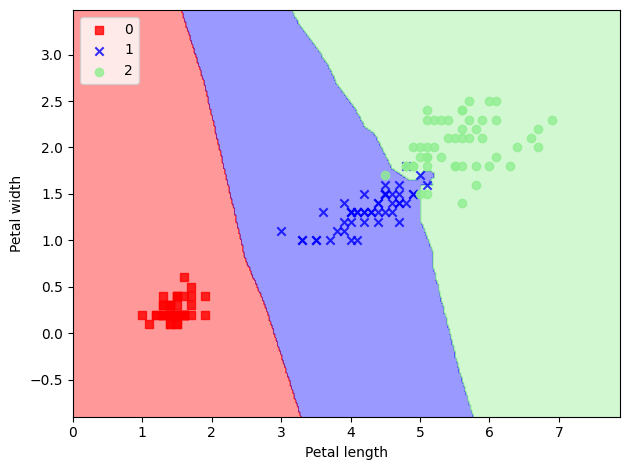

In [28]:
# Build a K-NN model
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X, y)

# Plot the decision boundary
plot_decision_regions(X, y, classifier = clf)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

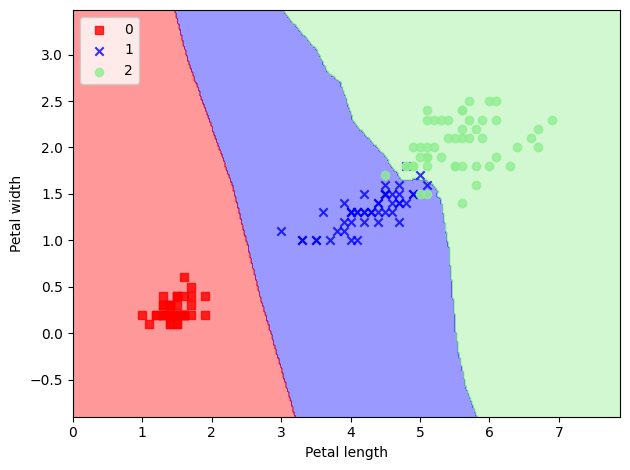

In [29]:
# Build a K-NN model
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X, y)

# Plot the decision boundary
plot_decision_regions(X, y, classifier = clf)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 3. Autoregressive Integrated Moving Average (ARIMA)
Data points that are collected sequentially at a regular time period are termed as **time-series** data. A time-series data having the **mean** and **variance** as constant is called **stationary time-series**.

Time-series tend to have a linear relationship between lagged variables and this is called as **autocorrelation**. Hence a time-series historic data can be modelled to forecast the future data points without involvement of any other independent variables. This process is generally known as **time-series forecasting**.

## Exercise 4: Time-series decomposing
First stage is creating a chart to see whether a **trend**, **cycle** and **seasonality** exists in the data set.

Mounted at /content/drive


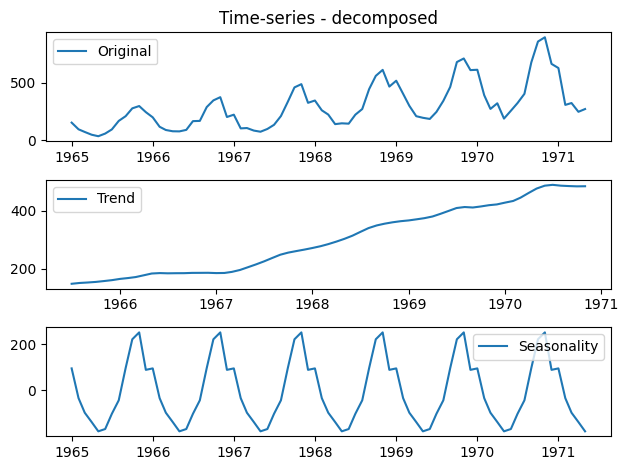

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
# Functions to calculate MAE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab07/TS.csv')
ts = pd.Series(list(df['Sales']), index = pd.to_datetime(df['Month'], format = '%Y-%m'))

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(311)
plt.title('Time-series - decomposed')
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(312)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(313)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc = 'best')
plt.tight_layout()

**Question:**
1. Based on the charts above assess whether a trend and seasonality in the data set exists. Justify your answer.

**Answer:**

## Exercise 5: Stationarize time-series
Second stage is checking for stationarity of a time-series. If the series is non-stationary, the right operations must be performed to achieve stationarity.

**1. Checking for stationarity.**

In [30]:
s_test = adfuller(ts, autolag = 'AIC')
# Extract p-value from test results
print('p-value > 0.05 means data is non-stationary:', s_test[1])

p-value > 0.05 means data is non-stationary: 0.9888894205170052


**2. Application of a log transform.**

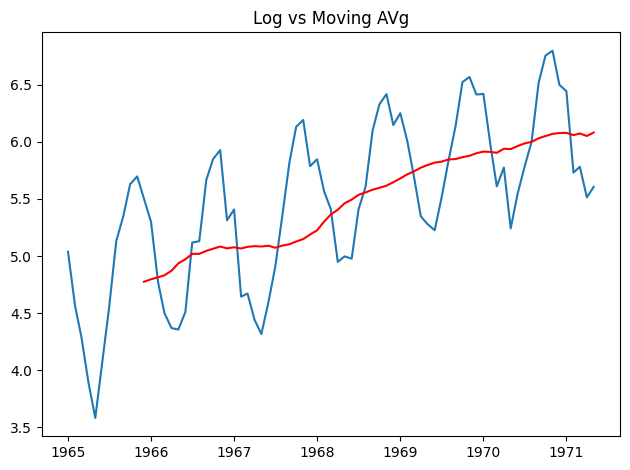

p-value after log transform: 0.7853102124849111


In [31]:
ts_log = np.log(ts)
ts_log.dropna(inplace = True)

moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.title('Log vs Moving AVg')
plt.tick_params(axis = 'x', labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 10)
plt.plot(moving_avg, color='red')
plt.tight_layout()
plt.show()

s_test = adfuller(ts_log, autolag = 'AIC')
print('p-value after log transform:', s_test[1])

**3. Application of the 1-st order difference technique.**

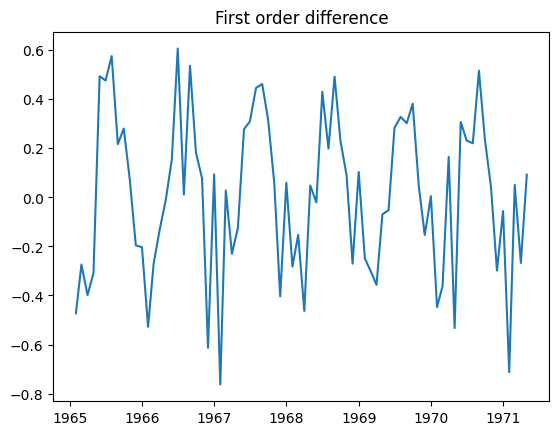

p-value after 1-st order difference: 0.024025392839875176


In [32]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace = True)

plt.title('First order difference')
plt.tick_params(axis = 'x', labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 10)
plt.plot(ts_log_diff)
plt.show()

s_test = adfuller(ts_log_diff, autolag = 'AIC')
print('p-value after 1-st order difference:', s_test[1])

**Questions:**
1. What does it mean that the time-series is stationary?
2. Is the original time-series stationary? How was this fact checked?
3. What is the purpose for applying of the log transform and 1-st order difference operations? Please discuss the results of these operations based on the charts above.
4. Was it possible to obtain the stationarity of the time-series? On what basis can you say that?

**Answers:**

## Exercise 6: Find optimal parameters
We determined that the log of time series requires at least one order differencing to stationarize. Now, in the third stage, we will plot **ACF** and **PACF** charts for first order log series. On this basis we can find the **p** and **q** parameters of the ARIMA model.

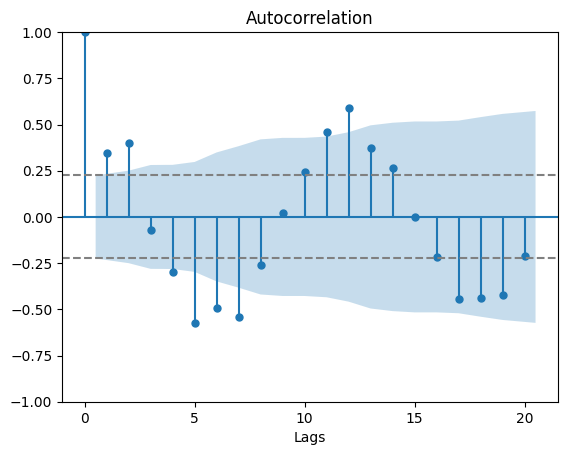

In [33]:
# ACF chart
sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags = 20)

# Draw 95% confidence interval line
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.tick_params(labelsize = 10)
plt.xlabel('Lags')
plt.show()

The **ACF** plot has significant spikes at lags 1 and 2. On this basis we assume **q=2**.

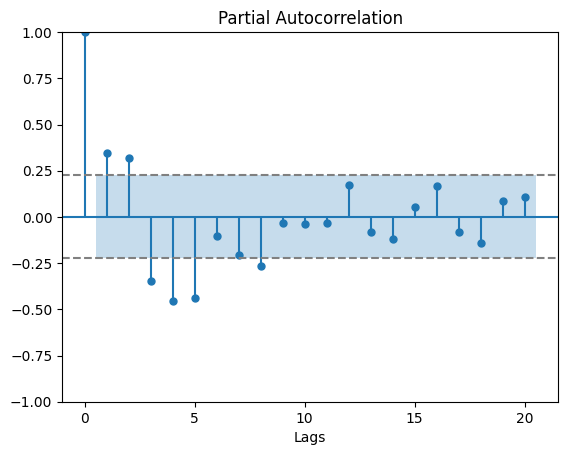

In [34]:
# PACF chart
sm.graphics.tsa.plot_pacf(ts_log_diff, lags = 20)

# Draw 95% confidence interval line
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.tick_params(labelsize = 10)
plt.xlabel('Lags')
plt.show()

The **PACF** plot has significant spikes at lags 1 and 2, meaning that all the higher-order autocorrelations are effectively explained by the lag-1 and lag-2 autocorrelation. On this basis we assume **p=2**.

**Question:**
1. The values in the ACF and PACF charts are alternately positive and negative. What does it mean?

**Answer:**

## Exercise 7: Model building and evaluation
The values of the **p**, **d** and **q** parameters were found. On this basis we can start the fourth stage, which is the building and evaluation of the **ARIMA(2,1,2)** model.

In [35]:
import warnings
warnings.filterwarnings('ignore')

# Build model
model = sm.tsa.ARIMA(ts_log, order = (2, 1, 2))

# disp controls the frequency of the output during the iterations, disp < 0 means no output.
results_ARIMA = model.fit()
ts_predict = results_ARIMA.predict()

# Evaluate model
print('AIC:', results_ARIMA.aic)
print('BIC:', results_ARIMA.bic)
print('Mean Absolute Error:', mean_absolute_error(ts_log.values, ts_predict.values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# Check autocorrelation
print('Durbin-Watson statistic:', sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC: -11.998860156981522
BIC: -0.34519345554986813
Mean Absolute Error: 0.2291715074921015
Root Mean Squared Error: 0.6117207175664372
Durbin-Watson statistic: 1.383335768796082


Usual practice is to build several models with different **p** and **q** and select the one with the smallest value of **AIC**, **BIC**, **MAE** and **RMSE**.

**Questions:**
1. Build models for different combinations of parameters: **p=2**, **p=3**, **q=2**, **q=3** and compare the evaluation results. Which model is better in your opinion and why?
2. How should the Durbin-Watson statistics be interpreted?

**Answers:**

1. (code below)lower AIC show better fit to the data while penalizing model complexity, so here model 2 is the best. BIC also needs to be low for better model, so again model 2. MAE and RMSE the lower the better, again model 2. so the best model here as parameters p = 3, d = 1, q = 2
2. The Dubrin-Watson statistic shows autocorrelation. It can be from 0 to 4, where 0 is strong autocorrelation, 2 no autocorrelation and 4 strong negative autocorrelation. In this case all models are close to 1.26 which indicates positive autocorrelation and might need fixing if it harms the analysis.

In [37]:
#model 1, p = 2, q = 3
import warnings
warnings.filterwarnings('ignore')

# Build model
model = sm.tsa.ARIMA(ts_log, order = (2, 1, 3))

# disp controls the frequency of the output during the iterations, disp < 0 means no output.
results_ARIMA = model.fit()
ts_predict = results_ARIMA.predict()

# Evaluate model
print('AIC:', results_ARIMA.aic)
print('BIC:', results_ARIMA.bic)
print('Mean Absolute Error:', mean_absolute_error(ts_log.values, ts_predict.values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# Check autocorrelation
print('Durbin-Watson statistic:', sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC: -30.940055457940737
BIC: -16.95565541622275
Mean Absolute Error: 0.22127531136961176
Root Mean Squared Error: 0.6040398298896376
Durbin-Watson statistic: 1.2663588145918514


In [38]:
#model 2, p = 3, q = 2
import warnings
warnings.filterwarnings('ignore')

# Build model
model = sm.tsa.ARIMA(ts_log, order = (3, 1, 2))

# disp controls the frequency of the output during the iterations, disp < 0 means no output.
results_ARIMA = model.fit()
ts_predict = results_ARIMA.predict()

# Evaluate model
print('AIC:', results_ARIMA.aic)
print('BIC:', results_ARIMA.bic)
print('Mean Absolute Error:', mean_absolute_error(ts_log.values, ts_predict.values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# Check autocorrelation
print('Durbin-Watson statistic:', sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC: -33.214560449309346
BIC: -19.23016040759136
Mean Absolute Error: 0.2108382725789007
Root Mean Squared Error: 0.6033803415010922
Durbin-Watson statistic: 1.2615089050751713


In [39]:
#model 3, p = 3, q = 3
import warnings
warnings.filterwarnings('ignore')

# Build model
model = sm.tsa.ARIMA(ts_log, order = (3, 1, 3))

# disp controls the frequency of the output during the iterations, disp < 0 means no output.
results_ARIMA = model.fit()
ts_predict = results_ARIMA.predict()

# Evaluate model
print('AIC:', results_ARIMA.aic)
print('BIC:', results_ARIMA.bic)
print('Mean Absolute Error:', mean_absolute_error(ts_log.values, ts_predict.values))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# Check autocorrelation
print('Durbin-Watson statistic:', sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC: -31.48532216008995
BIC: -15.170188778085631
Mean Absolute Error: 0.21174522224478812
Root Mean Squared Error: 0.603352564811311
Durbin-Watson statistic: 1.25574941481098


## Exercise 8: Predicting the future values
Use your model to predict the future values for the year 1972. Use the parameters **p**, **d** and **q** in the model, which gave the smallest values of the evaluation metrics in the previous exercise.

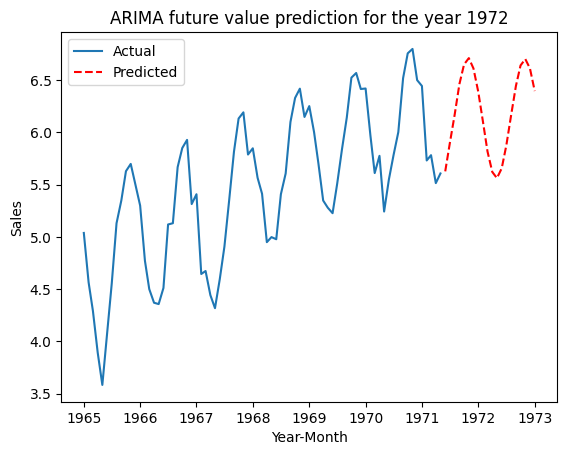

In [40]:
# Final model
model = sm.tsa.ARIMA(ts_log, order = (3, 1, 2))
results_ARIMA = model.fit()

# Predict future values
ts_predict = results_ARIMA.predict('1971-06-01', '1973-01-01')
plt.title('ARIMA future value prediction for the year 1972')
plt.plot(ts_log, label = 'Actual')
plt.plot(ts_predict, 'r--', label = 'Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.show()

**Questions:**
1. What can you say about the predicted sales for 1972?
2. Compare the prediction result for June 1971 and January 1972. What is the reason for this difference?

**Answers:**